In [53]:
import pandas as pd
import numpy as np
from tensorflow import feature_column
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [54]:
df=pd.read_csv('income_dataset.csv')

In [55]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [56]:
df=df.dropna()


In [57]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [58]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,0
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,0
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,0
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,0


In [59]:
df["workclass"] = df["workclass"].fillna("X")
df["occupation"] = df["occupation"].fillna("X")
df["native.country"] = df["native.country"].fillna("United-States")

# Confirm All Missing Data is Handled
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [60]:

df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
df["marital.status"] = df["marital.status"].map({"Married":1, "Single":0})
df["marital.status"] = df["marital.status"].astype(int)

In [61]:
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','marital.status']

# Identify Categorical features
cat_features = ['education', 'relationship', 'native.country']

In [62]:
train,test=df[0:26048], df[26048:]
train,val=df[:20838],df[20838:]

In [63]:
feature_columns = []

# numeric cols
for header in numeric_features:
  feature_columns.append(feature_column.numeric_column(header))

feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='education.num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital.gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital.loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='hours.per.week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='marital.status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [64]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,0,?,Not-in-family,0,4356,40,United-States,0
1,82,Private,186061.0,HS-grad,9,0,Exec-managerial,Not-in-family,0,4356,18,United-States,0
3,54,Private,140359.0,7th-8th,4,0,Machine-op-inspct,Unmarried,0,3900,40,United-States,0
4,41,Private,264663.0,Some-college,10,0,Prof-specialty,Own-child,0,3900,40,United-States,0
5,34,Private,216864.0,HS-grad,9,0,Other-service,Unmarried,0,3770,45,United-States,0


In [65]:
df["workclass"] = df["workclass"].replace('?', 'X')
df["occupation"] = df["occupation"].replace('?', 'X')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,X,77053.0,HS-grad,9,0,X,Not-in-family,0,4356,40,United-States,0
1,82,Private,186061.0,HS-grad,9,0,Exec-managerial,Not-in-family,0,4356,18,United-States,0
3,54,Private,140359.0,7th-8th,4,0,Machine-op-inspct,Unmarried,0,3900,40,United-States,0
4,41,Private,264663.0,Some-college,10,0,Prof-specialty,Own-child,0,3900,40,United-States,0
5,34,Private,216864.0,HS-grad,9,0,Other-service,Unmarried,0,3770,45,United-States,0


In [66]:
df.drop(labels=["workclass","occupation"], axis = 1, inplace = True)
print('Dataset with Dropped Labels')
print(df.head())

Dataset with Dropped Labels
   age    fnlwgt     education  education.num  marital.status   relationship  \
0   90   77053.0       HS-grad              9               0  Not-in-family   
1   82  186061.0       HS-grad              9               0  Not-in-family   
3   54  140359.0       7th-8th              4               0      Unmarried   
4   41  264663.0  Some-college             10               0      Own-child   
5   34  216864.0       HS-grad              9               0      Unmarried   

   capital.gain  capital.loss  hours.per.week native.country  income  
0             0          4356              40  United-States       0  
1             0          4356              18  United-States       0  
3             0          3900              40  United-States       0  
4             0          3900              40  United-States       0  
5             0          3770              45  United-States       0  


In [67]:
for feature in cat_features:
    l = df[feature].unique()
#     print(l)
    f = feature_column.categorical_column_with_vocabulary_list(feature,l)
    one_hot = feature_column.indicator_column(f)
    feature_columns.append(one_hot)
    
print(feature_columns)

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='education.num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital.gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='capital.loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='hours.per.week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='marital.status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='education', vocabulary_list=('HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm', 'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Pr

In [68]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('income')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [69]:
batch_size = 32

train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [70]:
train_ds

<BatchDataset element_spec=({'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'workclass': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'fnlwgt': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'education': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'education.num': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'marital.status': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'occupation': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'relationship': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'capital.gain': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'capital.loss': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'hours.per.week': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'native.country': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [71]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [72]:
feature_layer

In [73]:
feature_columns

[NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='fnlwgt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='education.num', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital.gain', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='capital.loss', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='hours.per.week', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='marital.status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='education', vocabulary_list=('HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm', 'Assoc-voc', '1st-4th', '5th-6th', '12th', '9t

Epoch 1/25
652/652 [==============================] - 3s 3ms/step - loss: 365.8973 - accuracy: 0.6635 - val_loss: 185.4430 - val_accuracy: 0.8081
Epoch 2/25
652/652 [==============================] - 2s 3ms/step - loss: 82.5137 - accuracy: 0.6745 - val_loss: 10.6022 - val_accuracy: 0.1919
Epoch 3/25
652/652 [==============================] - 2s 3ms/step - loss: 12.5951 - accuracy: 0.6880 - val_loss: 1.7169 - val_accuracy: 0.2785
Epoch 4/25
652/652 [==============================] - 2s 2ms/step - loss: 2.8313 - accuracy: 0.7303 - val_loss: 0.4909 - val_accuracy: 0.8081
Epoch 5/25
652/652 [==============================] - 2s 3ms/step - loss: 0.7824 - accuracy: 0.7826 - val_loss: 0.4902 - val_accuracy: 0.8081
Epoch 6/25
652/652 [==============================] - 2s 3ms/step - loss: 0.7134 - accuracy: 0.7828 - val_loss: 0.4900 - val_accuracy: 0.8081
Epoch 7/25
652/652 [==============================] - 2s 3ms/step - loss: 0.6573 - accuracy: 0.7831 - val_loss: 0.4908 - val_accuracy: 0.8081

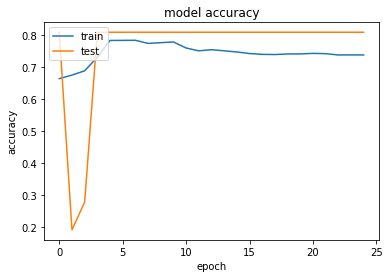

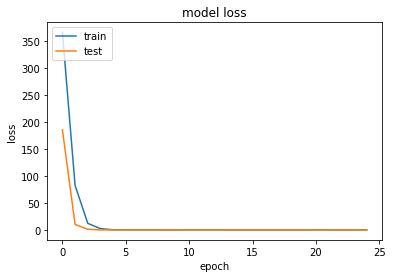

In [74]:
import matplotlib.pyplot as plt
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


history=model.fit(train_ds,
          validation_data=val_ds,
          epochs=25)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

204/204 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.8079
Accuracy 0.8078930974006653


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [77]:
df

,age,fnlwgt,education,education.num,marital.status,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,77053.0,HS-grad,9,0,Not-in-family,0,4356,40,United-States,0
1,82,186061.0,HS-grad,9,0,Not-in-family,0,4356,18,United-States,0
3,54,140359.0,7th-8th,4,0,Unmarried,0,3900,40,United-States,0
4,41,264663.0,Some-college,10,0,Own-child,0,3900,40,United-States,0
5,34,216864.0,HS-grad,9,0,Unmarried,0,3770,45,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152.0,Some-college,10,0,Not-in-family,0,0,40,United-States,0
32557,27,257302.0,Assoc-acdm,12,1,Wife,0,0,38,United-States,0
32558,40,154374.0,HS-grad,9,1,Husband,0,0,40,United-States,1
32559,58,151910.0,HS-grad,9,0,Unmarried,0,0,40,United-States,0


In [78]:
train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,X,77053.0,HS-grad,9,0,X,Not-in-family,0,4356,40,United-States,0
1,82,Private,186061.0,HS-grad,9,0,Exec-managerial,Not-in-family,0,4356,18,United-States,0
3,54,Private,140359.0,7th-8th,4,0,Machine-op-inspct,Unmarried,0,3900,40,United-States,0
4,41,Private,264663.0,Some-college,10,0,Prof-specialty,Own-child,0,3900,40,United-States,0
5,34,Private,216864.0,HS-grad,9,0,Other-service,Unmarried,0,3770,45,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20834,46,Private,193047.0,HS-grad,9,1,Exec-managerial,Husband,0,0,40,United-States,1
20835,62,State-gov,39630.0,Bachelors,13,1,Prof-specialty,Husband,0,0,40,United-States,0
20836,57,Local-gov,213975.0,HS-grad,9,0,Other-service,Unmarried,0,0,30,United-States,0
20837,60,Local-gov,259803.0,Bachelors,13,1,Prof-specialty,Wife,0,0,45,United-States,1


In [79]:
test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
26049,18,X,67793.0,HS-grad,9,0,X,Own-child,0,0,60,United-States,0
26050,27,Private,289147.0,Bachelors,13,0,Prof-specialty,Own-child,0,0,40,United-States,0
26051,21,Private,229826.0,Some-college,10,1,Machine-op-inspct,Husband,0,0,20,United-States,0
26052,49,Self-emp-inc,246739.0,Some-college,10,1,Craft-repair,Husband,0,0,45,United-States,1
26053,35,Private,188041.0,Some-college,10,1,Exec-managerial,Husband,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,0,Protective-serv,Not-in-family,0,0,40,United-States,0
32557,27,Private,257302.0,Assoc-acdm,12,1,Tech-support,Wife,0,0,38,United-States,0
32558,40,Private,154374.0,HS-grad,9,1,Machine-op-inspct,Husband,0,0,40,United-States,1
32559,58,Private,151910.0,HS-grad,9,0,Adm-clerical,Unmarried,0,0,40,United-States,0


In [109]:
X = np.array(df[['fnlwgt','education.num','income']])

In [110]:
y= np.array(df[['age']])

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape

(26048, 3)

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(X_train,y_train)

In [114]:
from sklearn.model_selection import cross_val_score

In [116]:
scores = cross_val_score(mymodel,X_train,y_train,scoring='r2',cv =10)
scores

array([0.06071013, 0.05383297, 0.06540978, 0.0654745 , 0.06046282,
       0.07332786, 0.0595812 , 0.06677545, 0.0607229 , 0.06176949])

In [117]:
print(np.mean(scores))

0.06280670902275605


In [119]:
from sklearn.model_selection import cross_val_predict
pred =cross_val_predict(model,X_test,y_test)
pred

array([[44.28566154],
       [36.73907826],
       [41.97669979],
       ...,
       [36.19016122],
       [37.05079724],
       [35.77973146]])

In [123]:
scores_test = cross_val_score(model,X_test,y_test,cv=10)
scores

array([0.06071013, 0.05383297, 0.06540978, 0.0654745 , 0.06046282,
       0.07332786, 0.0595812 , 0.06677545, 0.0607229 , 0.06176949])

In [125]:
print(np.mean(scores_test))

0.055450345202570486


In [101]:
X

,fnlwgt,income
0,77053.0,0
1,186061.0,0
3,140359.0,0
4,264663.0,0
5,216864.0,0
...,...,...
32556,310152.0,0
32557,257302.0,0
32558,154374.0,1
32559,151910.0,0


In [102]:
cv = LeaveOneOut()

In [103]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dropout(.2),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X,
          validation_data=val_ds,
          epochs=25)

Epoch 1/25


ValueError: in user code:

    File "C:\Users\Soumith\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Soumith\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Soumith\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Soumith\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Soumith\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Soumith\anaconda3\lib\site-packages\keras\feature_column\dense_features.py", line 158, in call
        raise ValueError('We expected a dictionary here. Instead we got: ',

    ValueError: Exception encountered when calling layer "dense_features_1" (type DenseFeatures).
    
    We expected a dictionary here. Instead we got: 
    
    Call arguments received:
      • features=tf.Tensor(shape=(None, 2), dtype=float32)
      • cols_to_output_tensors=None
      • training=True


In [104]:
scores = cross_val_score(model,X,y,scoring ='neg_mean_absolute_error', cv=cv, n_jobs =-1)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x000001415BC77B80>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [105]:
print(sqrt(mean(absolute(scores))))

3.3308833829596045
